In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import country_converter

In [2]:
df = pd.read_csv('clean_movie.csv')
df.head()

,Unnamed: 0,Title,Rating,Year,Month,Certificate,Runtime,Directors,Stars,Genre,Filming_location,Budget,Income,Country_of_origin
0,0,Avatar: The Way of Water,7.8,2022,December,PG-13,192.0,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...","Action, Adventure, Fantasy",New Zealand,350000000.0,2.267947e+09,United States
1,1,Guillermo del Toro's Pinocchio,7.6,2022,December,PG,117.0,"Guillermo del Toro, Mark Gustafson","Ewan McGregor, David Bradley, Gregory Mann, Bu...","Animation, Drama, Family",USA,35000000.0,1.089670e+05,"United States, Mexico, France"
2,2,Bullet Train,7.3,2022,August,R,127.0,David Leitch,"Brad Pitt, Joey King, Aaron Taylor Johnson, Br...","Action, Comedy, Thriller",Japan,85900000.0,2.392686e+08,"Japan, United States"
3,4,M3gan,6.4,2022,December,PG-13,102.0,Gerard Johnstone,"Jenna Davis, Amie Donald, Allison Williams, Vi...","Horror, Sci-Fi, Thriller",New Zealand,12000000.0,1.712539e+08,United States
4,6,Amsterdam,6.1,2022,October,R,134.0,David O Russell,"Christian Bale, Margot Robbie, John David Wash...","Comedy, Drama, History",USA,80000000.0,3.124581e+07,"United States, Japan"


In [19]:
filming_location = df['Filming_location'].value_counts().rename_axis('Country').reset_index(name='Number of movies')
filming_location.drop(filming_location[filming_location['Country'] == 'Unknown'].index, inplace=True)
filming_location['ISO'] = filming_location['Country'].apply(lambda x: country_converter.convert(names=x, to='ISO3', not_found='Unknown'))
filming_location.drop(filming_location[filming_location['ISO'] == 'Unknown'].index, inplace=True)

Official Facebook not found in regex
Ontario not found in regex
California USA not found in regex
Arctic Ocean not found in regex
Northern Ireland not found in regex
Polynesia not found in regex
Norge not found in regex
Space not found in regex
Michigan USA not found in regex


In [20]:
world_map = px.choropleth(filming_location,
                          locations='ISO',
                          color='Number of movies', 
                          hover_name='Country', 
                          color_continuous_scale=px.colors.sequential.matter)

world_map.update_layout(coloraxis_showscale=True)

world_map.show()

In [4]:
import geopandas as gpd

Chúng ta sẽ dùng violin để trực quan về thể loại phim và rating của nó

In [21]:
df.head()

,Unnamed: 0,Title,Rating,Year,Month,Certificate,Runtime,Directors,Stars,Genre,Filming_location,Budget,Income,Country_of_origin
0,0,Avatar: The Way of Water,7.8,2022,December,PG-13,192.0,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...","Action, Adventure, Fantasy",New Zealand,350000000.0,2.267947e+09,United States
1,1,Guillermo del Toro's Pinocchio,7.6,2022,December,PG,117.0,"Guillermo del Toro, Mark Gustafson","Ewan McGregor, David Bradley, Gregory Mann, Bu...","Animation, Drama, Family",USA,35000000.0,1.089670e+05,"United States, Mexico, France"
2,2,Bullet Train,7.3,2022,August,R,127.0,David Leitch,"Brad Pitt, Joey King, Aaron Taylor Johnson, Br...","Action, Comedy, Thriller",Japan,85900000.0,2.392686e+08,"Japan, United States"
3,4,M3gan,6.4,2022,December,PG-13,102.0,Gerard Johnstone,"Jenna Davis, Amie Donald, Allison Williams, Vi...","Horror, Sci-Fi, Thriller",New Zealand,12000000.0,1.712539e+08,United States
4,6,Amsterdam,6.1,2022,October,R,134.0,David O Russell,"Christian Bale, Margot Robbie, John David Wash...","Comedy, Drama, History",USA,80000000.0,3.124581e+07,"United States, Japan"


In [22]:
df_temp = df[['Rating','Genre']]

df_temp['Genre'] = df_temp['Genre'].str.split(',')
df_temp = df_temp.explode('Genre')
df_temp['Genre'] = df_temp['Genre'].str.replace(' ','')


C:\Users\HP\AppData\Local\Temp\ipykernel_5716\1626008351.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [23]:
df_temp['Genre'].unique()

array(['Action', 'Adventure', 'Fantasy', 'Animation', 'Drama', 'Family',
       'Comedy', 'Thriller', 'Horror', 'Sci-Fi', 'History', 'Crime',
       'Mystery', 'Romance', 'Biography', 'Music', 'War', 'Musical',
       'Sport', 'Western'], dtype=object)

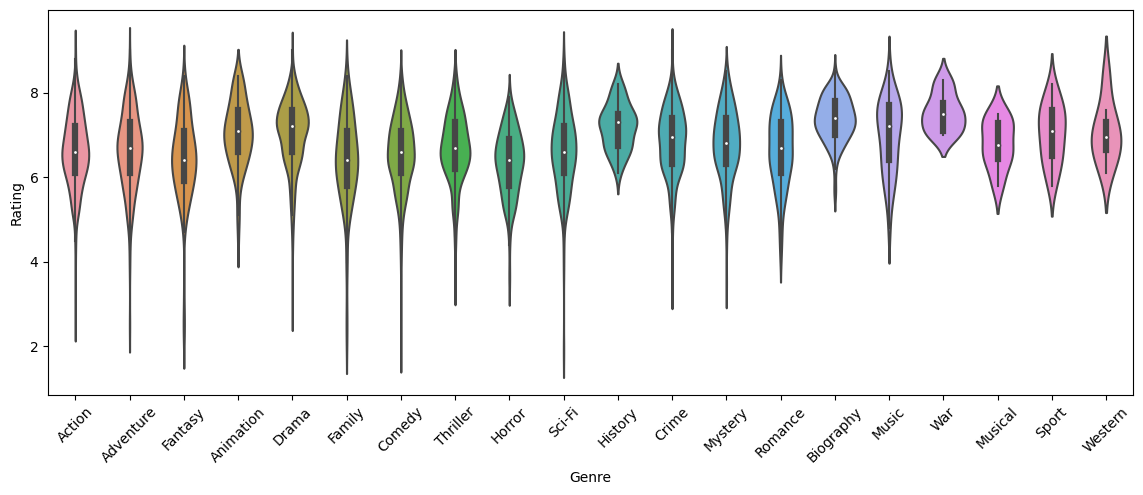

In [24]:
plt.figure(figsize=(14, 5))
sns.violinplot(x="Genre", y="Rating", data=df_temp)
plt.xticks(rotation=45)
plt.show()

% Certificate	

In [25]:
cer_df = df['Certificate'].value_counts()
cer_df

R            728
PG-13        663
PG           195
Not Rated     30
G             21
TV-MA          7
NC-17          4
Unrated        2
TV-14          1
Name: Certificate, dtype: int64

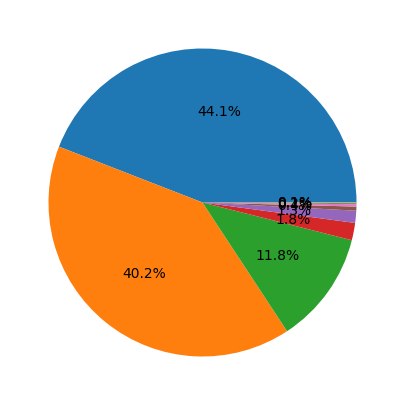

In [26]:
plt.figure(figsize=(14, 5))
plt.pie(cer_df,autopct='%1.1f%%')
plt.show()

Mối qh điểm và income

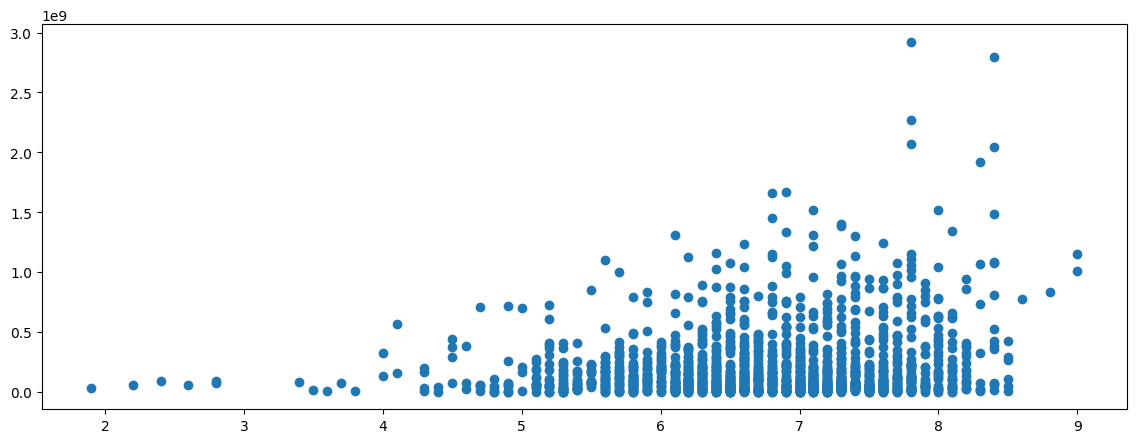

In [27]:
plt.figure(figsize=(14, 5))
#plt.scatter(X_scaled[:,0],X_scaled[:,1])
plt.scatter(df['Rating'],df['Income'])
plt.show()

In [33]:
temp_df = df[['Certificate', 'Genre', 'Title', 'Rating']]

temp_df['Genre'] = temp_df['Genre'].str.split(',')
temp_df = temp_df.explode('Genre')
temp_df['Genre'] = temp_df['Genre'].str.replace(' ','')

C:\Users\HP\AppData\Local\Temp\ipykernel_5716\737016326.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [34]:
burst = px.sunburst(temp_df, 
                    path=['Certificate', 'Genre', 'Title'], 
                    values='Rating',
                    width=1000, 
                    height=1000
                    )

burst.show()